In [1]:
import pyforest

In [277]:
geo = pd.read_csv("Location, Region, and Area of National Park in America.csv")
spec = pd.read_csv("Species for Each Individuals of the National Park in America.csv", low_memory=False)
spec = spec.drop('Unnamed: 13', axis=1)

In [278]:
#Expand the State's abbreviation
geo["State_FullName"] = np.nan
geo["State_FullName"] = np.where(geo["State"]=="ME", "Maine", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="UT", "Utah", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="SD", "South Dakota", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="TX", "Texas", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="FL", "Florida", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="CO", "Colorado", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="NM", "New Mexico", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="CA", "California", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="SC", "South Carolina", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="OR", "Oregon", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="OH", "Ohio", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="AK", "Alaska", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="CA, NV", "California/Nevada", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="MT", "Montana", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="NV", "Nevada", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="AZ", "Arizona", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="TN, NC", "Tennessee/North Carolina", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="WY", "Wyoming", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="HI", "Hawaii", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="AR", "Arkansas", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="MI", "Michigan", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="KY", "Kentucky", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="WA", "Washington", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="VA", "Virginia", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="ND", "North Dakota", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="MN", "Minnesota", geo["State_FullName"])
geo["State_FullName"] = np.where(geo["State"]=="WY, MT, ID", "Wyoming, Montana,Idaho", geo["State_FullName"])
geo.loc[geo['State'] == 'CA, NV', 'State'] = 'CA'
geo.loc[geo['State'] == 'TN, NC', 'State'] = 'TN'
geo.loc[geo['State'] == 'WY, MT, ID', 'State'] = 'WY'
df = pd.merge(geo, spec, on='Park Name')
df['Status'] = df['Conservation Status'].fillna('Safe').astype(str)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [279]:
import geopandas as gp
# Peta National Park
us_park = gp.read_file('us-national-park/National_Park_Service_Land_Resources_Division_Tract_and_Boundary_Service.shp')
peta_np = us_park[us_state['UNIT_TYPE']=='National Park']
peta_np = peta_np[['UNIT_NAME', 'geometry']]
peta_np.loc[peta_np['UNIT_NAME'] == 'Denali National Park', 'UNIT_NAME'] = 'Denali National Park and Preserve'
peta_np.loc[peta_np['UNIT_NAME'] == 'Gates of the Arctic National Park', 'UNIT_NAME'] = 'Gates Of The Arctic National Park and Preserve'
peta_np.loc[peta_np['UNIT_NAME'] == 'Glacier Bay National Park', 'UNIT_NAME'] = 'Glacier Bay National Park and Preserve'
peta_np.loc[peta_np['UNIT_NAME'] == "Hawai'i Volcanoes National Park", 'UNIT_NAME'] = 'Hawaii Volcanoes National Park'
peta_np.loc[peta_np['UNIT_NAME'] == 'Great Sand Dunes National Park', 'UNIT_NAME'] = 'Great Sand Dunes National Park and Preserve'
peta_np.loc[peta_np['UNIT_NAME'] == 'Katmai National Park', 'UNIT_NAME'] = 'Katmai National Park and Preserve'
peta_np.loc[peta_np['UNIT_NAME'] == 'Lake Clark National Park', 'UNIT_NAME'] = 'Lake Clark National Park and Preserve'
peta_np.loc[peta_np['UNIT_NAME'] == 'Sequoia National Park', 'UNIT_NAME'] = 'Sequoia and Kings Canyon National Parks'
peta_np.loc[peta_np['UNIT_NAME'] == 'Wrangell-St. Elias National Park', 'UNIT_NAME'] = 'Wrangell - St Elias National Park and Preserve'

peta_np = peta_np.rename(columns={'UNIT_NAME': 'Park Name'})
data_geo = pd.merge(geo, peta_np, on='Park Name')
data_geo = gpd.GeoDataFrame(data_geo, geometry=data_geo['geometry'])

In [280]:
# Data Regresi
df_reg1 = df.groupby(['Park Name', 'State_FullName', 'Acres', 'Status'])['Species ID'].nunique().reset_index()
df_reg1 = df_reg1.pivot_table(index=['Park Name', 'State_FullName', 'Acres'], columns='Status', values='Species ID', fill_value=0).reset_index()
df_reg1['Conservation Status'] = df_reg1[['Breeder', 'Endangered', 'Extinct', 'In Recovery', 'Migratory', 'Proposed Endangered', 
        'Proposed Threatened', 'Resident', 'Species of Concern', 'Threatened', 'Under Review']].sum(axis=1)
df_reg1['Species'] = df_reg1[['Breeder', 'Endangered', 'Extinct', 'In Recovery', 'Migratory', 'Proposed Endangered', 
        'Proposed Threatened', 'Resident', 'Species of Concern', 'Threatened', 'Under Review', 'Safe']].sum(axis=1)
df_reg1 = df_reg1[['Park Name', 'State_FullName', 'Acres', 'Conservation Status', 'Species']]

df_reg2 = df.groupby(['Park Name', 'State_FullName', 'Acres', 'Nativeness'])['Species ID'].nunique().reset_index()
df_reg2 = df_reg2.pivot_table(index=['Park Name', 'State_FullName', 'Acres'], columns='Nativeness', values='Species ID', fill_value=0).reset_index()
df_reg2 = df_reg2[['Park Name', 'Not Native']]

df_reg3 = df.groupby(['Park Name', 'State_FullName', 'Acres', 'Abundance'])['Species ID'].nunique().reset_index()
df_reg3 = df_reg3.pivot_table(index=['Park Name', 'State_FullName', 'Acres'], columns='Abundance', values='Species ID', fill_value=0).reset_index()
df_reg3['Abundant'] = df_reg3['Abundant'] + df_reg3['Common']
df_reg3 = df_reg3[['Park Name', 'Abundant']]

df_temp = pd.merge(df_reg1, df_reg2, on='Park Name')
df_reg = pd.merge(df_temp, df_reg3, on='Park Name')
df = pd.merge(df_reg, geo, on='Park Name')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

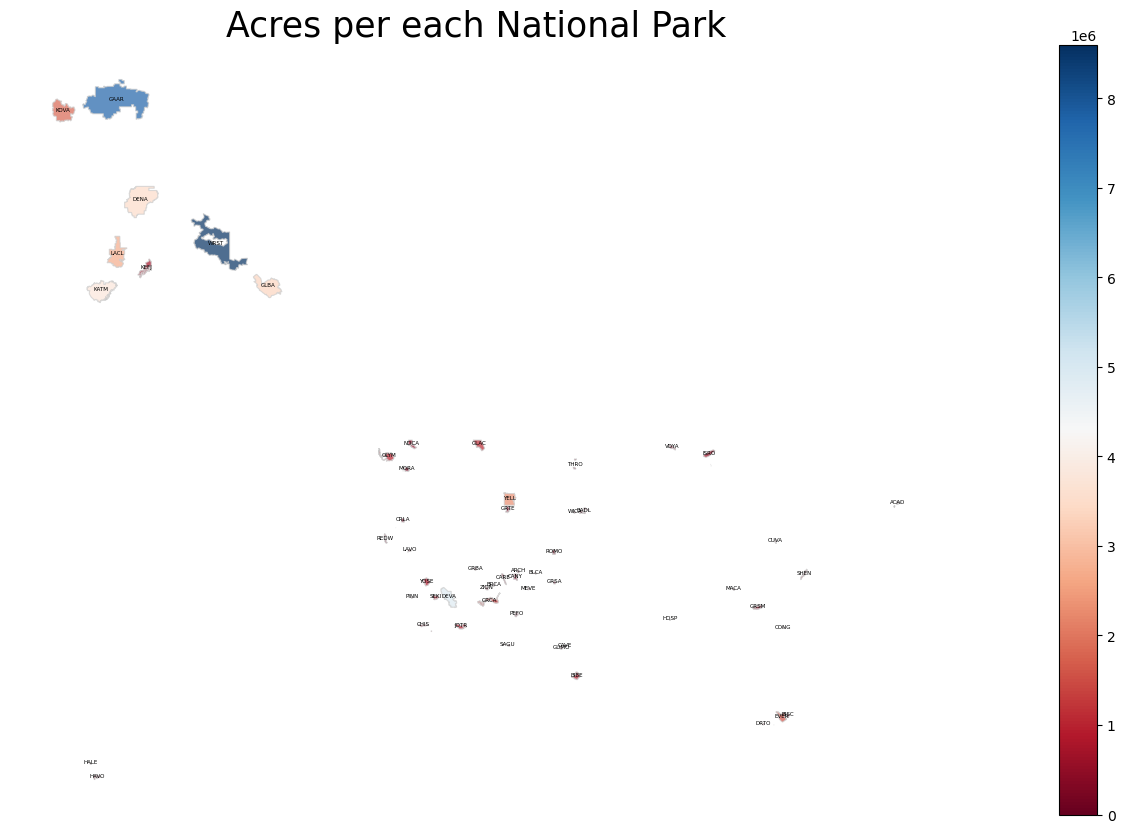

In [265]:
# set the value column that will be visualised
variable = 'Acres'
# set the range for the choropleth values
vmin, vmax = 0, 8600000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Acres per each National Park', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []
# add the colorbar to the figure
fig.colorbar(sm)
# create map
data_geo.plot(column=variable, cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)
# Add labels of national park names to each coordinate
for x, y, label in zip(data_geo.geometry.centroid.x, data_geo.geometry.centroid.y, data_geo['Park Code']):
    ax.text(x, y, label, fontsize=4, ha='center')

# Display the map
plt.show()

# EDA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

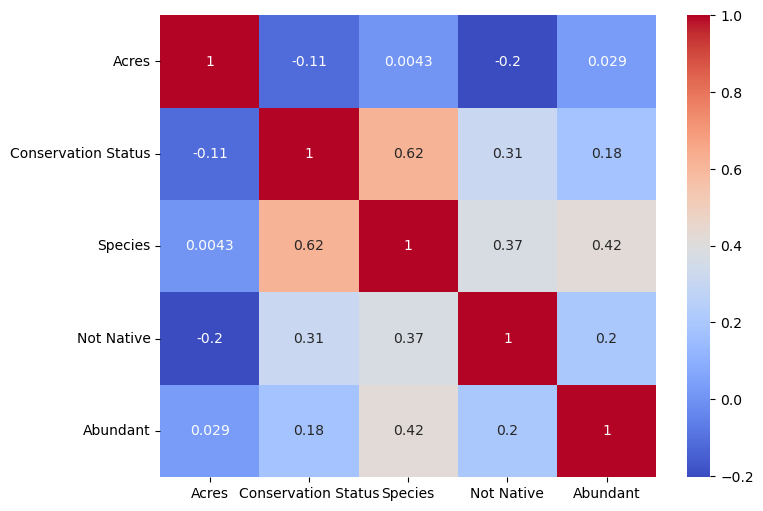

In [245]:
# Menghitung matriks korelasi
correlation_matrix = df_reg.drop(['Park Name', 'State_FullName'], axis = 1).corr()

# Menampilkan matriks korelasi dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 10})

# Menampilkan grafik
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

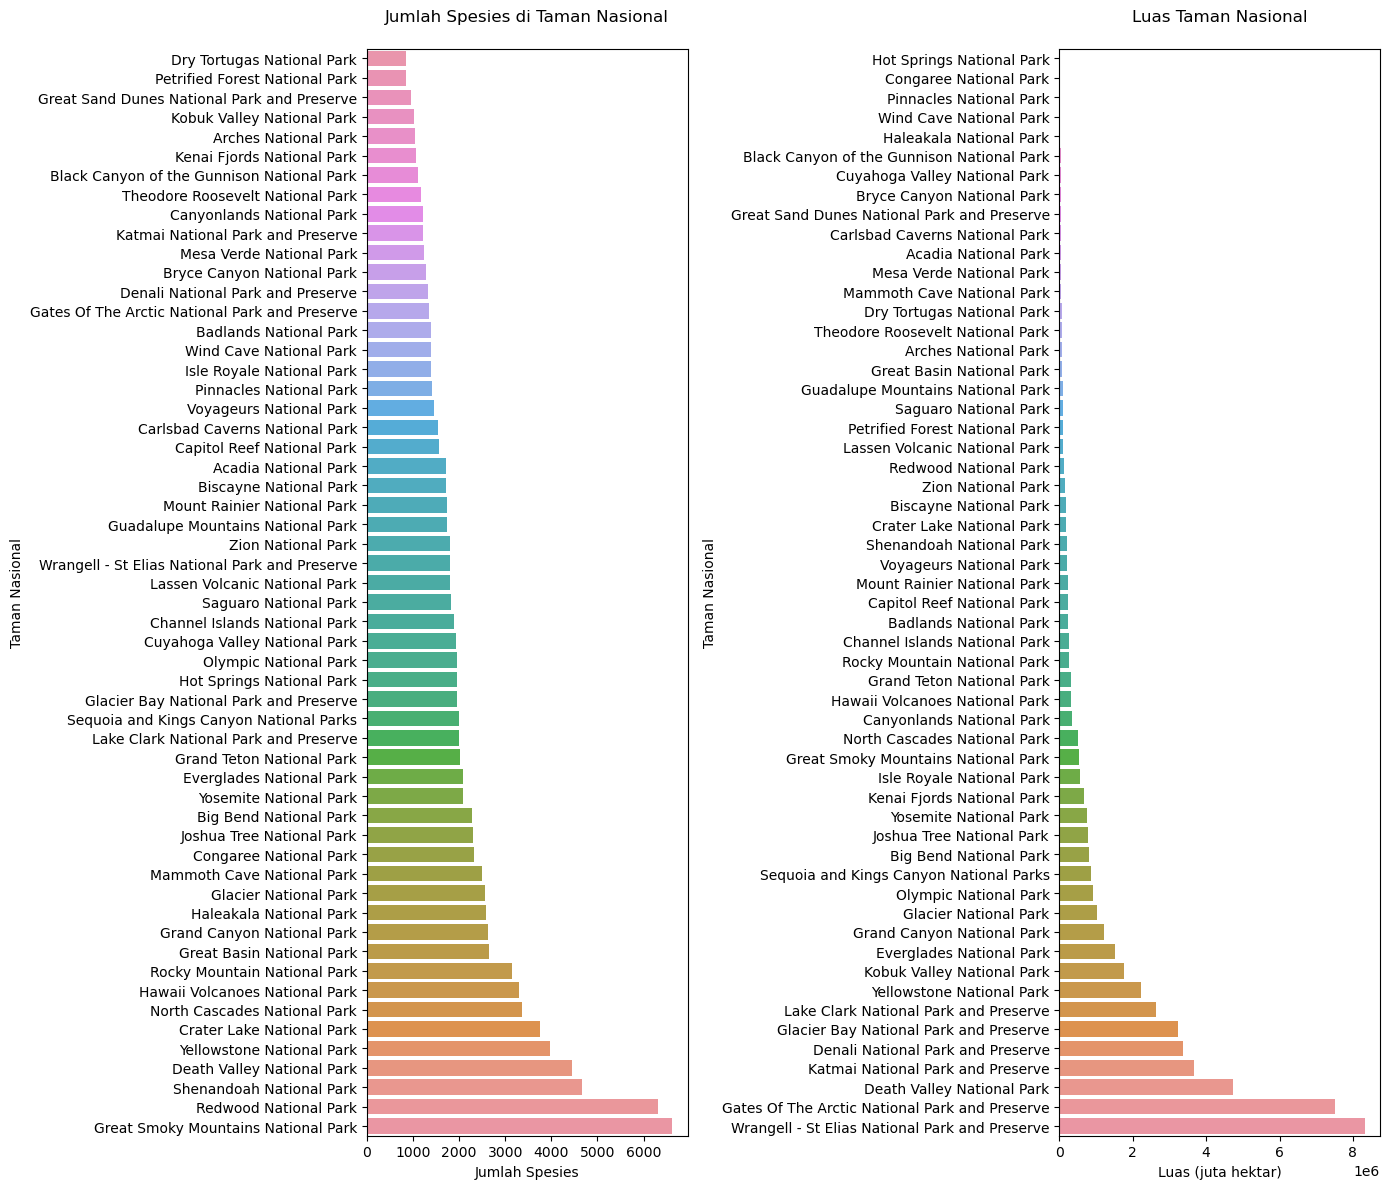

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 12))

# Grafik Jumlah Spesies
park_spec = df.groupby('Park Name')['Species ID'].nunique().sort_values(ascending=False).reset_index(name='Unique_Species_Count')
sns.barplot(x='Unique_Species_Count', y='Park Name', data=park_spec, ax=ax1)
ax1.set_title('Jumlah Spesies di Taman Nasional', pad=20)
ax1.set_ylabel('Taman Nasional')
ax1.set_xlabel('Jumlah Spesies')
ax1.invert_yaxis()

# Grafik Luas Taman Nasional
sorted_df = geo.sort_values('Acres', ascending=False)
sns.barplot(x='Acres', y='Park Name', data=sorted_df, ax=ax2)
ax2.set_title('Luas Taman Nasional', pad=20)
ax2.set_ylabel('Taman Nasional')
ax2.set_xlabel('Luas (juta hektar)')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

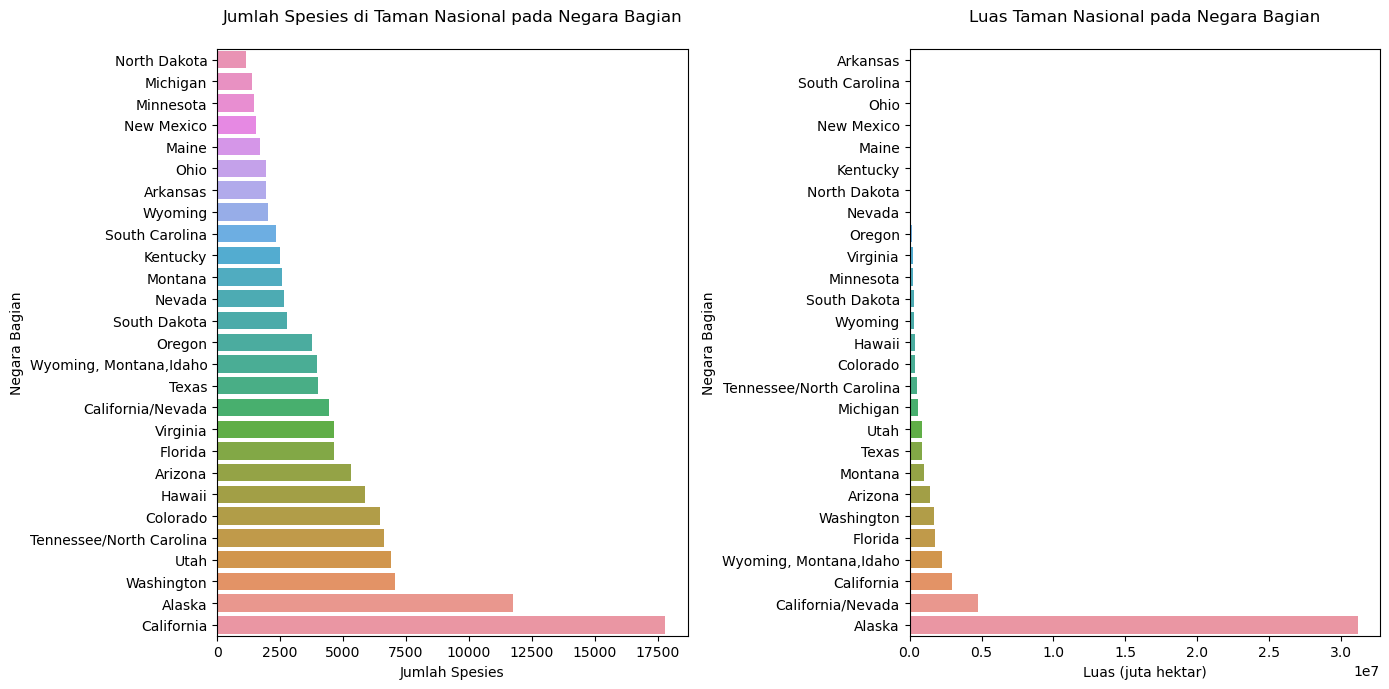

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Grafik Jumlah Spesies
state_spec = df.groupby('State_FullName')['Species ID'].nunique().sort_values(ascending=False).reset_index(name='Unique_Species_Count')
sns.barplot(x='Unique_Species_Count', y='State_FullName', data=state_spec, ax=ax1)
ax1.set_title('Jumlah Spesies di Taman Nasional pada Negara Bagian', pad=20)
ax1.set_ylabel('Negara Bagian')
ax1.set_xlabel('Jumlah Spesies')
ax1.invert_yaxis()

# Grafik Luas Taman Nasional
reg_ac = geo.groupby('State_FullName').sum().sort_values('Acres', ascending=False).reset_index()
sns.barplot(x='Acres', y='State_FullName', data=reg_ac, ax=ax2)
ax2.set_title('Luas Taman Nasional pada Negara Bagian', pad=20)
ax2.set_ylabel('Negara Bagian')
ax2.set_xlabel('Luas (juta hektar)')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

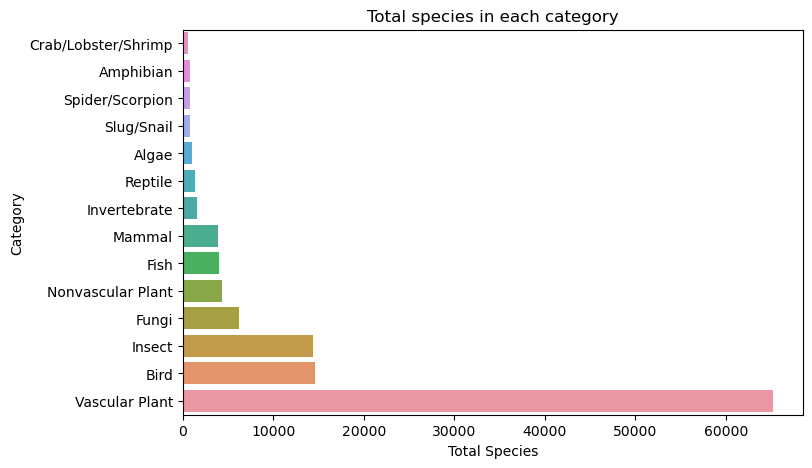

In [232]:
spec_cat = df.groupby('Category').size().reset_index(name='Category Count').sort_values('Category Count', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Category Count', y='Category', data=spec_cat)
plt.xlabel('Total Species')
plt.ylabel('Category')
plt.title('Total species in each category')
# plt.xticks(rotation=90, ha='center')
plt.gca().invert_yaxis()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

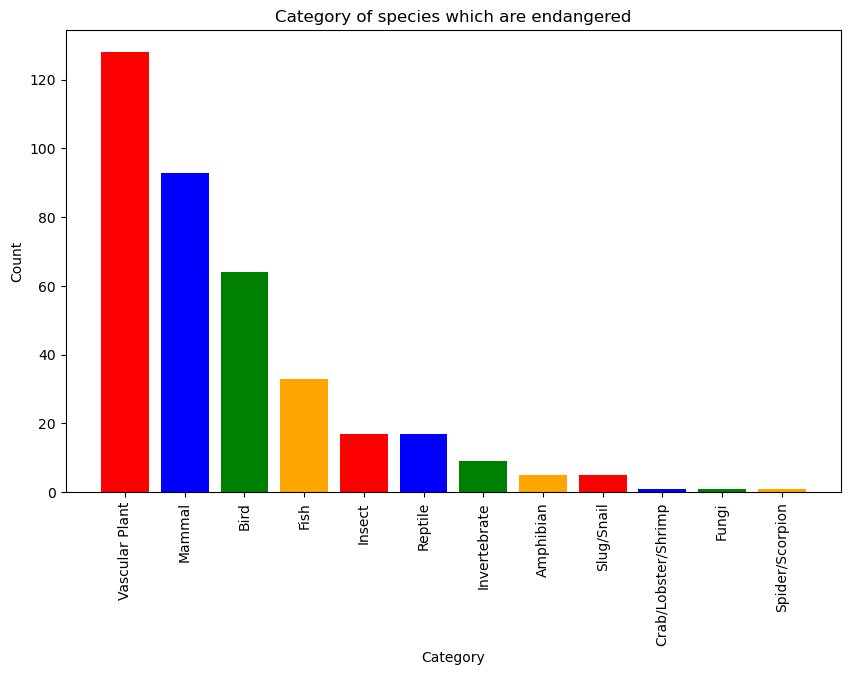

In [326]:
temp_en = spec[spec['Conservation Status'] == "Endangered"].groupby('Category').size().reset_index(name='count').sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(temp_en['Category'], temp_en['count'], color=['red', 'blue', 'green', 'orange'])
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category of species which are endangered')
plt.show()

Vascular plant paling terancam punah diikuti oleh Mammal.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

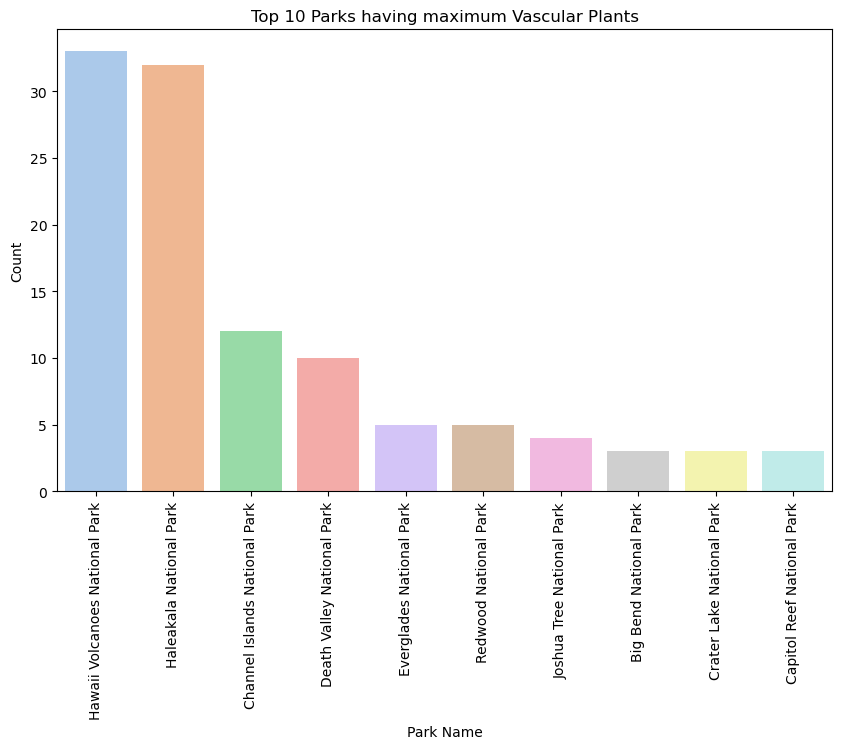

In [331]:
temp_en_p = spec[(spec['Category'] == "Vascular Plant") & (spec['Conservation Status'] == "Endangered")].groupby('Park Name').size().reset_index(name='count').sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Park Name', y='count', data=temp_en_p.head(10), palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Park Name')
plt.ylabel('Count')
plt.title('Top 10 Parks having maximum Vascular Plants')
plt.show()

Hawaii Volcanoes National Park ,Haleakala National Park , Channel Island National Park ,Death Valley National Park memiliki jumlah maksimum vascular plant yang terancam punah.

In [324]:
#import libraries
import pandas as pd
import plotly.express as px

fig = px.choropleth(df, locations='State',
                    locationmode="USA-states", color='Acres_x', scope="usa")
fig.update_traces(text=df['State_FullName_x'], customdata=df['Acres_x'], hovertemplate='<b>%{text}</b><br>Acres: %{customdata}')
fig.update_layout(
    title={
        'text': 'Jumlah Luas Taman Nasional per Negara Bagian di USA',
        'x': 0.5,
        'xanchor': 'center'
    },
    coloraxis_colorbar_title='Acres',
)
fig.add_scattergeo(
    locations=df['State'],
    locationmode="USA-states", 
    text=df['State_FullName_y'],
    mode='text',
    textfont=dict(color='lightgray')
)
fig.show()

Didapatkan bahwa taman nasional yang terletak di Alaska memiliki luas terbesar daripada negara bagian lainnya sementara di Arkansas memiliki luas terkecil daripada negara bagian lainnya

In [321]:
fig = px.choropleth(df, locations='State',
                    locationmode="USA-states", color='Conservation Status', scope="usa")
fig.update_traces(text=df['State_FullName_x'], customdata=df['Conservation Status'], hovertemplate='<b>%{text}</b><br>Spesies: %{customdata}')
fig.update_layout(
    title={
        'text': 'Jumlah Spesies Konservasi per Negara Bagian di USA',
        'x': 0.5,
        'xanchor': 'center'
    },
    coloraxis_colorbar_title='Spesies Konservasi',
)
fig.add_scattergeo(
    locations=df['State'],
    locationmode="USA-states", 
    text=df['State_FullName_y'],
    mode='text',
    textfont=dict(color='white')
)
fig.show()

Didapatkan California memiliki jumlah spesies konservasi terbanyak dan Alaska memiliki jumlah spesies konservasi terkecil

In [319]:
fig = px.choropleth(df, locations='State',
                    locationmode="USA-states", color='Species', scope="usa")
fig.update_traces(text=df['State_FullName_x'], customdata=df['Species'], hovertemplate='<b>%{text}</b><br>Spesies: %{customdata}')
fig.update_layout(
    title={
        'text': 'Jumlah Keragaman Spesies per Negara Bagian di USA',
        'x': 0.5,
        'xanchor': 'center'
    },
    coloraxis_colorbar_title='Spesies',
)
fig.add_scattergeo(
    locations=df['State'],
    locationmode="USA-states", 
    text=df['State_FullName_y'],
    mode='text',
    textfont=dict(color='grey')
)
fig.show()

Didapatkan Tennesse memiliki jumlah keragaman spesies yang paling banyak sementara Utah memiliki jumlah keragaman spesies paling sedikit

In [313]:
fig = px.choropleth(df, locations='State',
                    locationmode="USA-states", color='Not Native', scope="usa")
fig.update_traces(text=df['State_FullName_x'], customdata=df['Not Native'], hovertemplate='<b>%{text}</b><br>Spesies: %{customdata}')
fig.update_layout(
    title={
        'text': 'Jumlah Spesies Bukan Asli per Negara Bagian di USA',
        'x': 0.5,
        'xanchor': 'center'
    },
    coloraxis_colorbar_title='Spesies',
)
fig.add_scattergeo(
    locations=df['State'],
    locationmode="USA-states", 
    text=df['State_FullName_y'],
    mode='text',
    textfont=dict(color='red')
)
fig.show()

Didapatkan Hawai memiliki jumlah spesies bukan asli taman nasional tersebut paling banyak sementara Alaska paling kecil

In [306]:
fig = px.choropleth(df, locations='State',
                    locationmode="USA-states", color='Abundant', scope="usa")
fig.update_traces(text=df['State_FullName_x'], customdata=df['Abundant'], hovertemplate='<b>%{text}</b><br>Spesies: %{customdata}')
fig.update_layout(
    title={
        'text': 'Jumlah Kelimpahan Spesies per Negara Bagian di USA',
        'x': 0.5,
        'xanchor': 'center'
    },
    coloraxis_colorbar_title='Spesies',
)
fig.add_scattergeo(
    locations=df['State'],
    locationmode="USA-states", 
    text=df['State_FullName_y'],
    mode='text',
    textfont=dict(color='grey')
)
fig.show()

Didapatkan Montana memiliki jumlah spesies paling banyak dan Oregon paling kecil

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

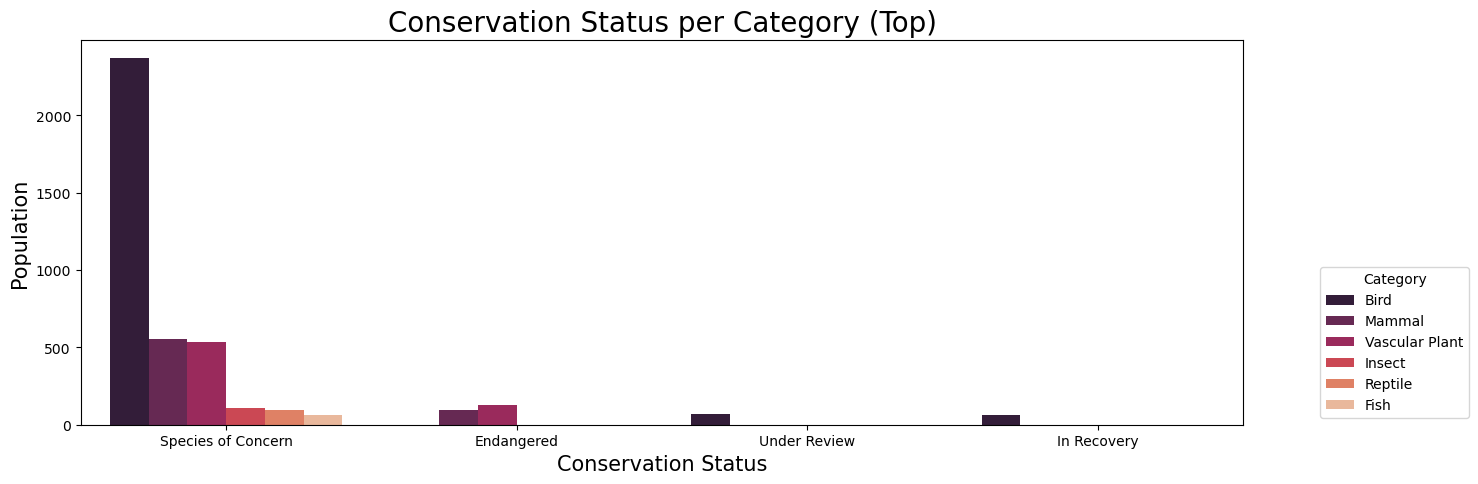

In [307]:
plt.figure(figsize=(15,5))
Conservation_Status_df = pd.DataFrame(spec.groupby(["Conservation Status", "Category"]).size().reset_index())
Conservation_Status_df.rename(columns={0:"Counts"}, inplace=True)
Conservation_Status_smallest = Conservation_Status_df.nsmallest(20, "Counts")
Conservation_Status_biggest = Conservation_Status_df.nlargest(10, "Counts")
sns.barplot(x="Conservation Status", y="Counts", hue="Category", data=Conservation_Status_biggest, palette="rocket", orient="v")
plt.title("Conservation Status per Category (Top)", fontsize=20)
plt.ylabel("Population", fontsize=15)
plt.xlabel("Conservation Status", fontsize=15)
plt.legend(loc="lower right", bbox_to_anchor=(1.2, 0), title="Category")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

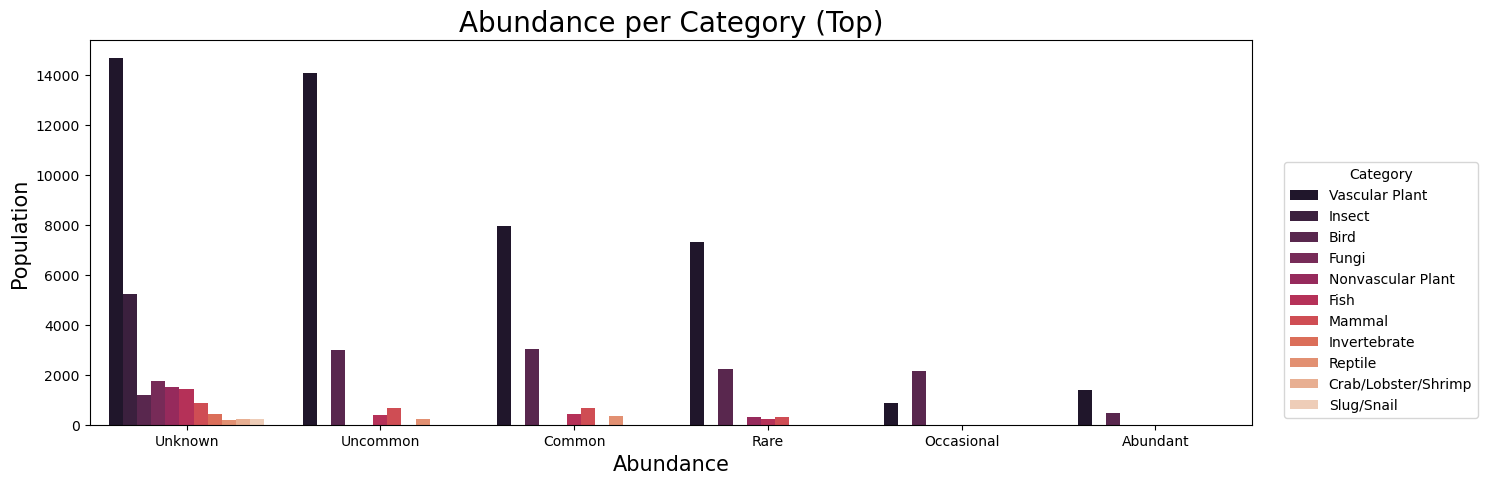

In [308]:
plt.figure(figsize=(15,5))
abundance_df = pd.DataFrame(spec.groupby(["Abundance", "Category"]).size().reset_index())
abundance_df.rename(columns={0:"Counts"}, inplace=True)
abundance_smallest = abundance_df.nsmallest(30, "Counts")
abundance_biggest = abundance_df.nlargest(30, "Counts")
sns.barplot(x="Abundance", y="Counts", hue="Category", data=abundance_biggest, palette="rocket", orient="v")
plt.title("Abundance per Category (Top)", fontsize=20)
plt.ylabel("Population", fontsize=15)
plt.xlabel("Abundance", fontsize=15)
plt.legend(loc="lower right", bbox_to_anchor=(1.2, 0), title="Category")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

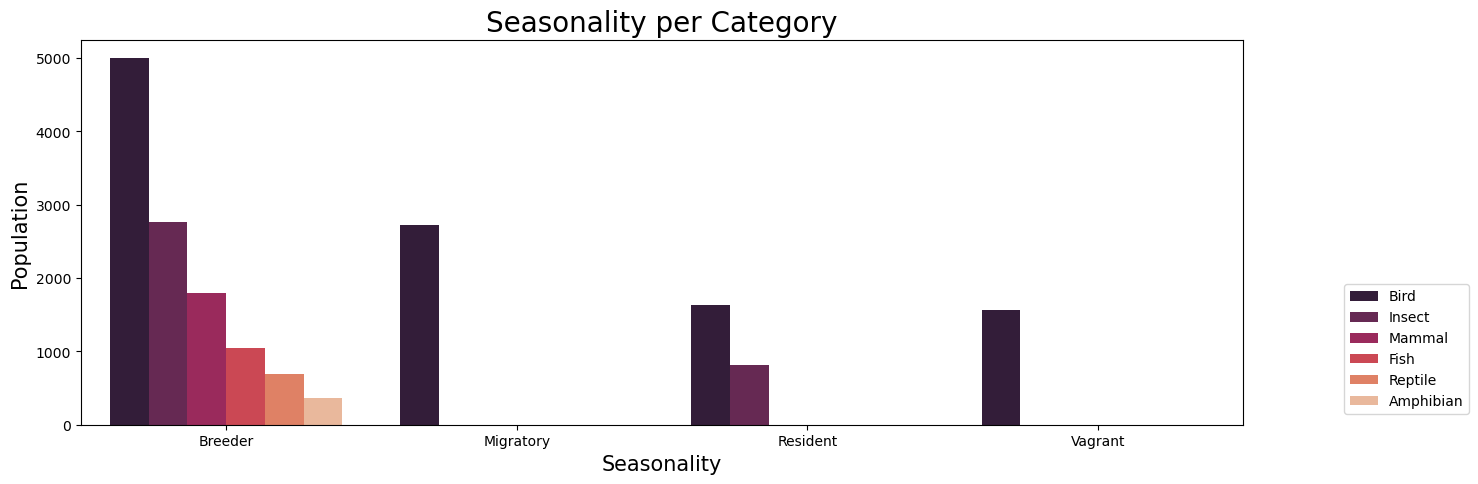

In [309]:
plt.figure(figsize=(15,5))
season_df = pd.DataFrame(spec.groupby(["Seasonality", "Category"]).size().reset_index())
season_df.rename(columns={0:"Counts"}, inplace=True)
season_df = season_df.nlargest(10, "Counts")
sns.barplot(x="Seasonality", y="Counts", hue="Category", data=season_df, palette="rocket")
plt.title("Seasonality per Category", fontsize=20)
plt.ylabel("Population", fontsize=15)
plt.xlabel("Seasonality", fontsize=15)
plt.legend(loc="lower right", bbox_to_anchor=(1.2,0.01))

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Native Species'}, ylabel='count'>

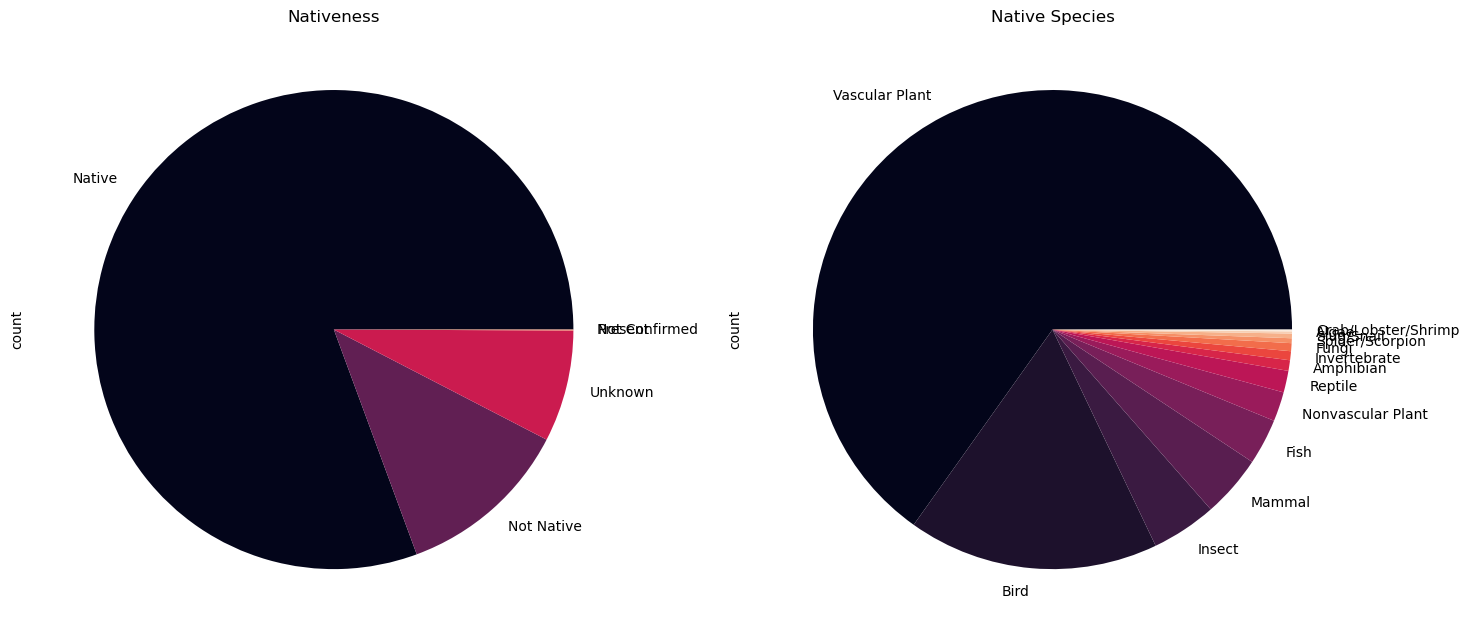

In [310]:
j, ax = plt.subplots(1,2, figsize=(17,50))
spec["Nativeness"].value_counts()[:6].plot(kind="pie", ax=ax[0], colormap="rocket", title="Nativeness")
species_of_concern = spec[spec["Nativeness"]=="Native"]
species_of_concern["Category"].value_counts().plot(kind="pie", ax=ax[1], colormap="rocket", title="Native Species")

# Clustering

In [5]:
df_pivot = df.groupby(['Park Name', 'State_FullName', 'Acres', 'Category'])['Species ID'].nunique().reset_index()
df_pivot = df_pivot.pivot_table(index=['Park Name', 'State_FullName', 'Acres'], columns='Category', values='Species ID', fill_value=0).reset_index()
df_pivot

Category,Park Name,State_FullName,Acres,Algae,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
0,Acadia National Park,Maine,47390,0,15,364,0,38,0,0,0,55,0,11,0,0,1226
1,Arches National Park,Utah,76519,0,8,205,0,11,0,0,0,59,0,20,0,0,745
2,Badlands National Park,South Dakota,242756,0,10,239,0,24,173,239,1,64,0,13,0,1,625
3,Big Bend National Park,Texas,801163,0,13,415,0,53,0,0,0,89,48,62,0,0,1589
4,Biscayne National Park,Florida,172924,0,8,233,0,818,0,11,34,28,0,40,0,0,554
5,Black Canyon of the Gunnison National Park,Colorado,32950,0,2,175,0,16,0,0,0,67,0,11,0,0,835
6,Bryce Canyon National Park,Utah,35835,0,4,217,0,1,0,0,0,76,0,13,0,0,975
7,Canyonlands National Park,Utah,337598,0,7,220,0,33,0,0,0,76,0,22,0,0,865
8,Capitol Reef National Park,Utah,241904,0,6,248,0,15,0,0,0,73,0,21,0,0,1203
9,Carlsbad Caverns National Park,New Mexico,46766,0,15,367,0,5,0,0,0,92,0,62,0,0,995


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

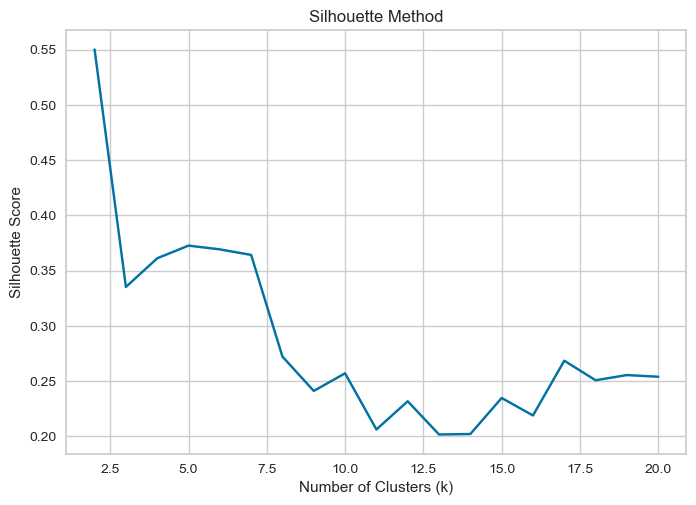

In [115]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

X = df_pivot.drop(['Park Name', 'State_FullName', 'Acres'], axis = 1)
# max_k adalah jumlah maksimum kluster yang akan dievaluasi

silhouette_avg = []
max_k = 20

for k in range(2, max_k+1):
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, labels))

plt.plot(range(2, max_k+1), silhouette_avg)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

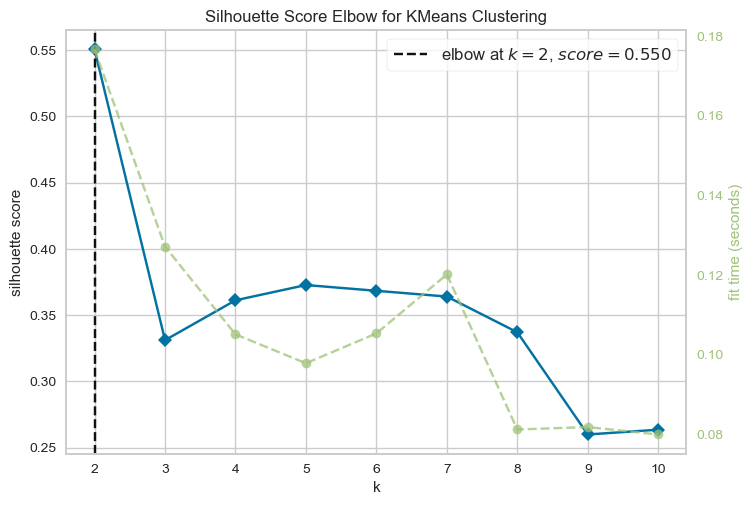

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [116]:
from yellowbrick.cluster import KElbowVisualizer
# Silhouette Score for K means
visualizer = KElbowVisualizer(kmeans,metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [119]:
# Klustering pada seluruh variabel
kmeans = KMeans(n_clusters=2, n_init=10)
df_pivot['Cluster'] = kmeans.fit_predict(X)
df_pivot['Lat'] = geo['Latitude']
df_pivot['Lon'] = geo['Longitude']

In [120]:
grp_c = df_pivot.groupby(['Cluster']).mean().round(1)
grp_c = grp_c.drop('Acres', axis = 1)
grp_c

Category,Algae,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant,Lat,Lon
Cluster,,,,,,,,,,,,,,,,
0,8.1,10.4,257.4,4.9,74.0,53.3,91.5,16.4,65.1,46.2,22.6,6.1,8.1,1043.3,41.4,-110.9
1,65.9,28.1,278.0,38.9,53.2,410.9,1116.7,88.2,89.6,234.0,31.1,55.4,44.0,1798.7,40.4,-125.4


In [121]:
import plotly.express as px
#Visualize Cluster
polar = grp_c.groupby("Cluster").mean().reset_index()
polar = pd.melt(polar,id_vars=["Cluster"])
polar
fig4 = px.line_polar(polar, r="value", theta="Category", color="Cluster", line_close=True,height=600,width=800)
fig4.show()

<IPython.core.display.Javascript object>

In [43]:
import folium

# Menentukan koordinat tengah peta
center_lat = df_pivot['Lat'].mean()
center_lon = df_pivot['Lon'].mean()

# Buat peta awal
map_clusters = folium.Map(location=[center_lat, center_lon], zoom_start=3)

# Daftar warna yang tersedia
colors = ['red', 'blue']

# Loop melalui setiap baris data klaster
for index, row in df_pivot.iterrows():
    lat = row['Lat']
    lon = row['Lon']
    cluster = row['Cluster']
    
    # Tambahkan penanda ke peta dengan warna berdasarkan klaster
    marker = folium.Marker(location=[lat, lon], icon=folium.Icon(color=colors[cluster]), popup=row['Park Name'])
    marker.add_to(map_clusters)

# Tampilkan peta
map_clusters

# Biru = Cluster 0
# Merah = Cluster 1